In [ ]:
pip install -U ydata-profiling

In [ ]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_pd = pd.read_excel("/content/Best sellers-01JAN23-31DEC23.xlsx")
df_pd.head()

,Product name,Manufacturer name,Category name,SKU,Available cases (QTY),Wholesale price,Retail price,Cases sold,Total revenue
0,Ginger Shots,GNGR Labs,Drinks,Immunity Aid / 2 fl oz,-320,29.88,47.88,372,11115.36
1,Ginger Shots,GNGR Labs,Drinks,Immunity Booster / 2 fl oz,525,29.88,47.88,366,10936.08
2,Ginger Shots,GNGR Labs,Drinks,Vitamin C / 2 fl oz,354,49.99,47.88,189,6049.52
3,Ginger Shots,GNGR Labs,Drinks,Digestive Aid / 2 fl oz,-200,29.88,47.88,190,5677.20
4,Test T,GNGR Labs,Uncategorized,1,0,1.00,2.00,5,5.00


In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product name           5 non-null      object 
 1   Manufacturer name      5 non-null      object 
 2   Category name          5 non-null      object 
 3   SKU                    5 non-null      object 
 4   Available cases (QTY)  5 non-null      int64  
 5   Wholesale price        5 non-null      float64
 6   Retail price           5 non-null      float64
 7   Cases sold             5 non-null      int64  
 8   Total revenue          5 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 488.0+ bytes


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

In [ ]:
# @title Report Order sales summary
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np

def preprocess_data(data):
    """
    Data preprocessing: data type conversion and cleaning.

    Args:
        data: A Pandas DataFrame with the source data.

    Returns:
        Pandas DataFrame with the processed data.
    """

    # Identify numeric columns automatically
    numeric_cols = data.select_dtypes(include=np.number).columns

    # Process numeric columns
    for col in numeric_cols:
        # Check for missing values (NaN)
        if np.isnan(data[col]).any():
            print(f"Warning: Column '{col}' contains missing values (NaN).")

    # Remove currency symbols and thousands separators
    data[numeric_cols] = data[numeric_cols].replace('[$,]', '', regex=True).astype(float)

    return data

In [ ]:
processed_data = preprocess_data(df_pd)

In [ ]:
processed_data

,Product name,Manufacturer name,Category name,SKU,Available cases (QTY),Wholesale price,Retail price,Cases sold,Total revenue
0,Ginger Shots,GNGR Labs,Drinks,Immunity Aid / 2 fl oz,-320.0,29.88,47.88,372.0,11115.36
1,Ginger Shots,GNGR Labs,Drinks,Immunity Booster / 2 fl oz,525.0,29.88,47.88,366.0,10936.08
2,Ginger Shots,GNGR Labs,Drinks,Vitamin C / 2 fl oz,354.0,49.99,47.88,189.0,6049.52
3,Ginger Shots,GNGR Labs,Drinks,Digestive Aid / 2 fl oz,-200.0,29.88,47.88,190.0,5677.20
4,Test T,GNGR Labs,Uncategorized,1,0.0,1.00,2.00,5.0,5.00


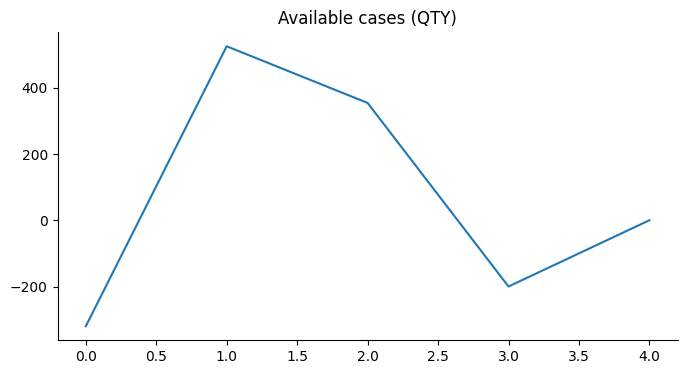

In [ ]:
# @title Available cases (QTY)

from matplotlib import pyplot as plt
processed_data['Available cases (QTY)'].plot(kind='line', figsize=(8, 4), title='Available cases (QTY)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_product_analysis(data, product_col='Product name', revenue_col='Total revenue', cases_col='Cases sold'):
  """
  Analyzes and visualizes product sales data, including total revenue and cases sold.

  Args:
    data (pd.DataFrame): The DataFrame containing product sales data.
    product_col (str, optional): The name of the product column. Defaults to 'Product name'.
    revenue_col (str, optional): The name of the revenue column. Defaults to 'Total revenue'.
    cases_col (str, optional): The name of the cases sold column. Defaults to 'Cases sold'.
  """
  product_data = data.groupby(product_col)[[revenue_col, cases_col]].agg(['sum', 'count']).sort_values(by=('Total revenue', 'sum'), ascending=False)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  sns.set_theme(style="whitegrid")
  palette = sns.color_palette("Set2")

  # Plot Total Revenue per Product
  product_data[('Total revenue', 'sum')].plot(kind='bar', ax=axes[0], color=palette)
  axes[0].set_title("Total Revenue by Product", fontsize=14)
  axes[0].set_xlabel("Product", fontsize=12)
  axes[0].set_ylabel("Revenue", fontsize=12)
  axes[0].grid(axis='y', alpha=0.5)
  axes[0].set_axisbelow(True)
  add_percentage_annotations(axes[0], product_data[('Total revenue', 'sum')])
  style_axes(axes[0])

  # Plot Total Cases Sold per Product
  product_data[('Cases sold', 'sum')].plot(kind='bar', ax=axes[1], color=palette)
  axes[1].set_title("Total Cases Sold by Product", fontsize=14)
  axes[1].set_xlabel("Product", fontsize=12)
  axes[1].set_ylabel("Cases Sold", fontsize=12)
  axes[1].grid(axis='y', alpha=0.5)
  axes[1].set_axisbelow(True)
  add_percentage_annotations(axes[1], product_data[('Cases sold', 'sum')])
  style_axes(axes[1])

  plt.tight_layout()
  for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  plt.show()

def add_percentage_annotations(ax, data):
  """Adds percentage annotations to bars in a bar plot."""
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f} ({(height/data.sum())*100:.1f}%)",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

def style_axes(ax):
  """Applies consistent styling to axes."""
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

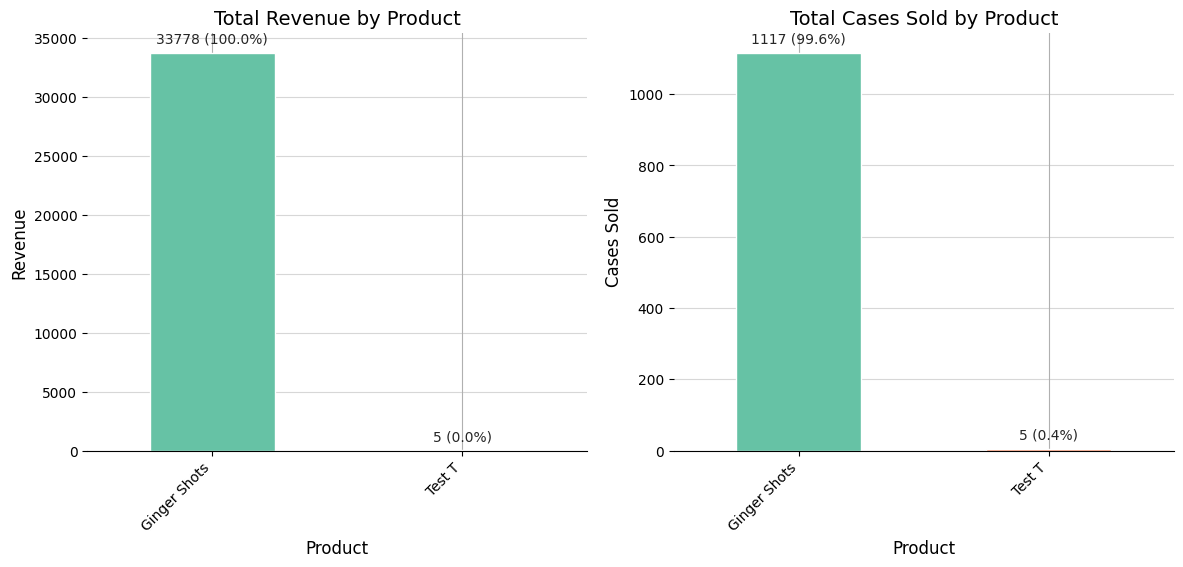

In [ ]:
visualize_product_analysis(processed_data)

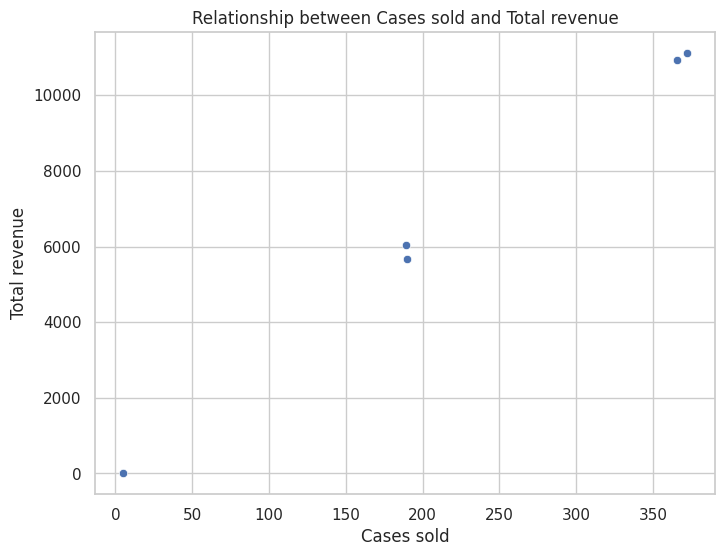

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_relationship(data, col1, col2, kind='scatter'):
  """
  Plots the relationship between two variables.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.
    kind (str, optional): The type of plot ('scatter', 'line', 'bar', etc.). Defaults to 'scatter'.
  """
  plt.figure(figsize=(8,6))
  if kind == 'scatter':
    sns.scatterplot(x=data[col1], y=data[col2])
  elif kind == 'line':
    sns.lineplot(x=data[col1], y=data[col2])
  elif kind == 'bar':
    sns.barplot(x=data[col1], y=data[col2])
  else:
    raise ValueError("Invalid plot type. Choose from 'scatter', 'line', or 'bar'.")
  plt.title(f"Relationship between {col1} and {col2}")
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

def analyze_correlation(data, threshold=0.5):
  """
  Analyzes correlations above a certain threshold and suggests visualizations.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    threshold (float, optional): The correlation threshold for suggesting visualizations. Defaults to 0.5.
  """
  corr_matrix = data.corr()
  high_correlations = (corr_matrix
                      .abs()
                      .unstack()
                      .sort_values(ascending=False)
                      .drop_duplicates())
  high_correlations = high_correlations[high_correlations > threshold]

  for col1, col2 in high_correlations.index:
    if col1 != col2:
      print(f"High correlation between {col1} and {col2}: {high_correlations.loc[(col1, col2)]:.2f}")
      print("Suggested visualization: Scatter plot")
      print("---")

#analyze_correlation(processed_data)
plot_relationship(processed_data, 'Cases sold', 'Total revenue')

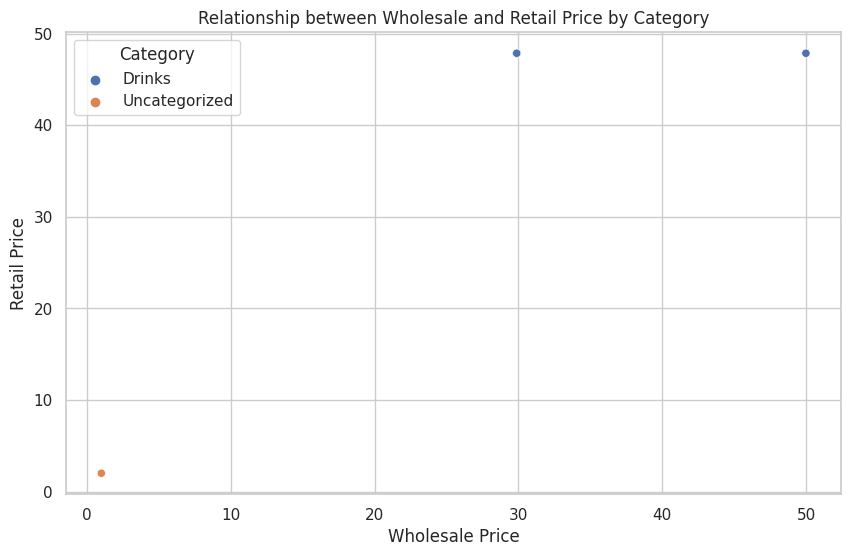

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_relationship_by_category(data, category_col, wholesale_col, retail_col):
  """
  Plots the relationship between wholesale and retail price for each category.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    category_col (str): The name of the category column.
    wholesale_col (str): The name of the wholesale price column.
    retail_col (str): The name of the retail price column.
  """
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=wholesale_col, y=retail_col, hue=category_col, data=data)
  plt.title("Relationship between Wholesale and Retail Price by Category")
  plt.xlabel("Wholesale Price")
  plt.ylabel("Retail Price")
  plt.legend(title="Category")
  plt.show()

plot_price_relationship_by_category(processed_data, 'Category name', 'Wholesale price', 'Retail price')

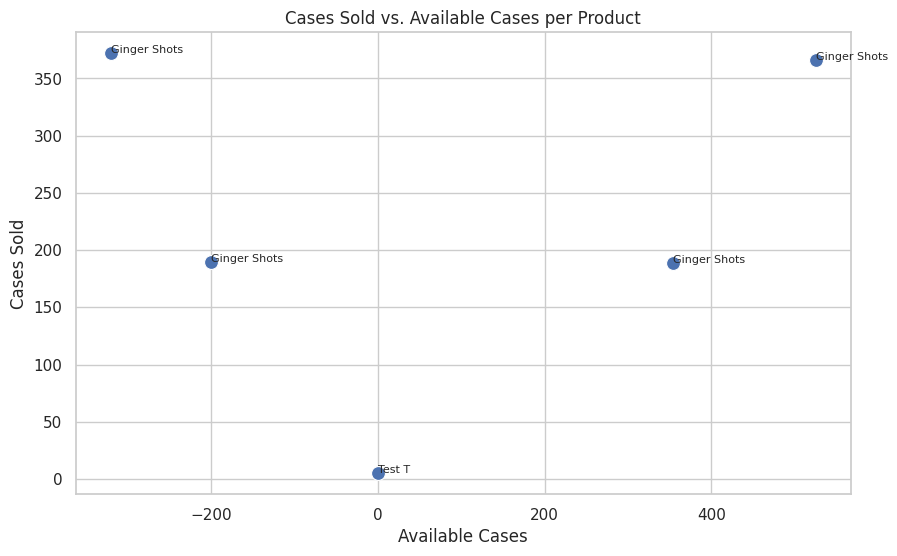

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_inventory_performance(data, product_col, cases_sold_col, available_cases_col):
  """
  Plots the number of cases sold against the available cases for each product.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    product_col (str): The name of the product column.
    cases_sold_col (str): The name of the cases sold column.
    available_cases_col (str): The name of the available cases column.
  """
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=available_cases_col, y=cases_sold_col, data=data, s=100)
  plt.title("Cases Sold vs. Available Cases per Product")
  plt.xlabel("Available Cases")
  plt.ylabel("Cases Sold")

  # Add product names as annotations
  for i, row in data.iterrows():
    plt.annotate(row[product_col], (row[available_cases_col], row[cases_sold_col]), fontsize=8)

  plt.show()

plot_inventory_performance(processed_data, 'Product name', 'Cases sold', 'Available cases (QTY)')

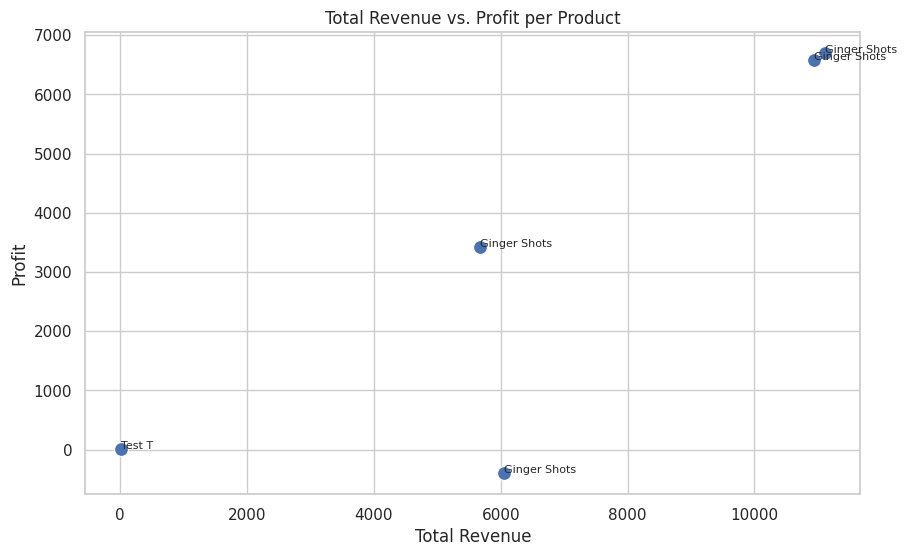

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_revenue_vs_profit(data, product_col, revenue_col, wholesale_col, retail_col):
  """
  Plots the total revenue against the profit for each product.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    product_col (str): The name of the product column.
    revenue_col (str): The name of the revenue column.
    wholesale_col (str): The name of the wholesale price column.
    retail_col (str): The name of the retail price column.
  """
  data['Profit'] = (data[retail_col] - data[wholesale_col]) * data['Cases sold']

  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=revenue_col, y='Profit', data=data, s=100)
  plt.title("Total Revenue vs. Profit per Product")
  plt.xlabel("Total Revenue")
  plt.ylabel("Profit")

  # Add product names as annotations
  for i, row in data.iterrows():
    plt.annotate(row[product_col], (row[revenue_col], row['Profit']), fontsize=8)

  plt.show()

plot_revenue_vs_profit(processed_data, 'Product name', 'Total revenue', 'Wholesale price', 'Retail price')

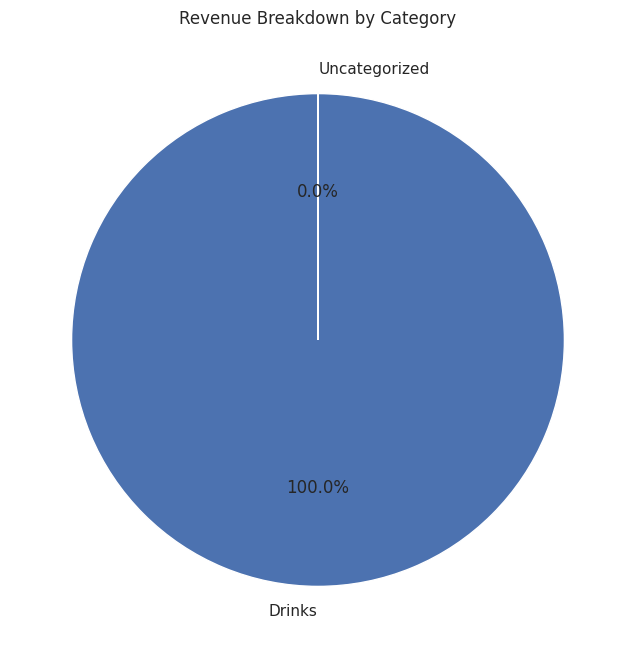

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_category_revenue_breakdown(data, category_col, revenue_col):
  """
  Plots a pie chart showing the breakdown of total revenue by category.

  Args:
    data (pd.DataFrame): The DataFrame containing the data.
    category_col (str): The name of the category column.
    revenue_col (str): The name of the revenue column.
  """
  category_revenue = data.groupby(category_col)[revenue_col].sum()

  plt.figure(figsize=(8, 8))
  plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=90)
  plt.title("Revenue Breakdown by Category")
  plt.show()

plot_category_revenue_breakdown(processed_data, 'Category name', 'Total revenue')